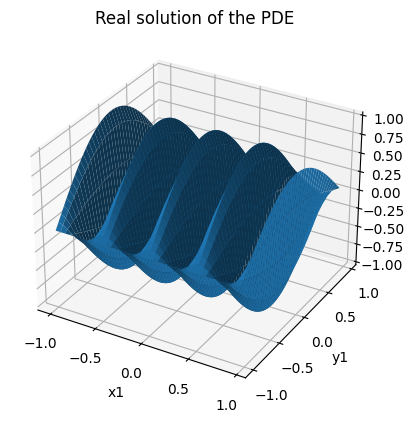

In [9]:
fig=plot_function(real_u)
plt.title('Real solution of the PDE')
plt.show()

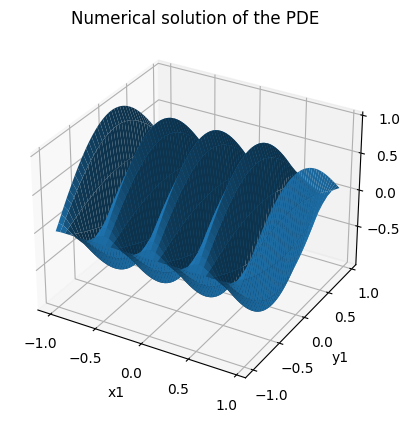

In [10]:
fig=plot_vectorized_function(u)
plt.title('Numerical solution of the PDE')
plt.show()

In [27]:
models=[
    PDESolverLaplace(X_int=make_points_inside(50),X_boundary=make_points_boundary(10),sigma=0.1,name=f'model {k}') for k in range(100)
]
for model in models:
    model.fit(f,real_u,nugget=1e-5)

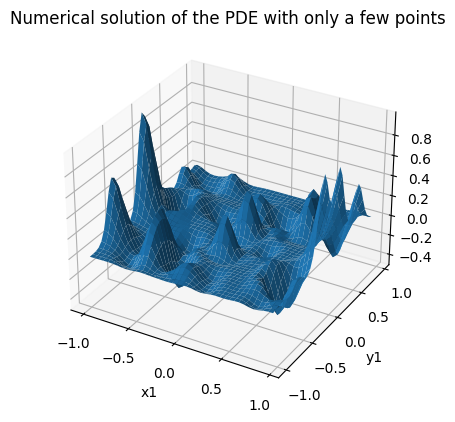

In [28]:
fig=plot_vectorized_function(models[46])
plt.title('Numerical solution of the PDE with only a few points')
plt.show()

In [40]:
aggregate=AggregateLaplace(models,nugget=1e-5)
mean_sol=lambda x: np.mean(np.array(list(map(lambda model:model(x),models))).T,axis=1)

M [[ 9.08423728e-03  1.75461673e-03  4.83645062e-06 ...  3.25619875e-03
   7.62002450e-03  7.47020411e-02]
 [ 1.20567571e-02  1.69898948e-03  1.68019268e-05 ...  4.40530443e-03
   9.40376173e-03  7.22746091e-02]
 [ 1.79136950e-03  1.55815710e-03  4.99210918e-05 ...  4.92808352e-03
   5.10355982e-03  5.31622702e-02]
 ...
 [-1.13199155e-02  3.90027159e-03  9.48465644e-04 ... -2.26158928e-03
   2.28082406e-02 -4.76468294e-03]
 [ 2.36361027e-03  2.36846851e-03  5.03270041e-04 ... -6.62870993e-04
   4.08380513e-02  1.59135498e-02]
 [ 1.13894051e-02  8.57158463e-04  1.90641943e-04 ... -1.36317887e-04
   5.88050041e-02  3.84325603e-02]]
COV mat [[[ 1.42468761e-02 -5.82573138e-05 -1.43245404e-07 ...  1.90846375e-04
    2.72045888e-04  3.83081859e-02]
  [-5.82573138e-05  4.71857185e-05 -7.03186218e-08 ...  1.02684866e-05
   -3.86113815e-05  7.87846741e-05]
  [-1.43245404e-07 -7.03186218e-08  1.00194056e-05 ... -1.92989385e-07
    1.67983981e-07  5.83148868e-07]
  ...
  [ 1.90846375e-04  1.02684

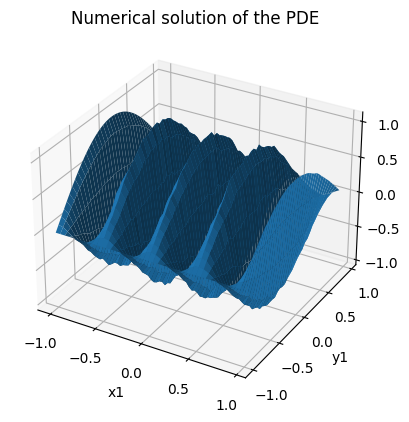

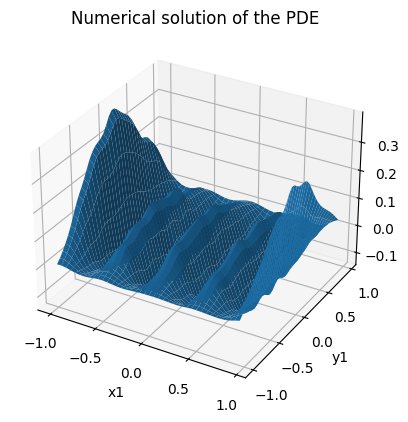

In [41]:
fig=plot_vectorized_function(mean_sol,0.05)
plt.title('Mean solution of the PDE')
plt.show()

In [32]:
print(np.linalg.norm(U-U_real,ord=np.inf))
np.linalg.norm(U_agg-U_real,ord=np.inf)

0.014706481303046434


0.1546384132101291

In [39]:

np.linalg.norm(np.mean(U_indivs,axis=0)-U_real,ord=np.inf)

0.9287964838396056

In [33]:
x_sample=np.array([[-0.7,-0.6]])
print(real_u(x_sample[0]))
aggregate(x_sample)

-0.47552825814757677
M [[-0.0492976  -0.01808238 -0.0475608  -0.03160416 -0.00652555 -0.01995485
  -0.05836062  0.01487124  0.00700029 -0.03186571 -0.02011299 -0.02936412
  -0.01593538  0.00414316 -0.07581913 -0.03206507 -0.0249035   0.02392429
  -0.03385113 -0.01870284 -0.1891493  -0.03282358  0.00543214 -0.04555898
  -0.04967589 -0.00417274  0.00281238 -0.17545846  0.00156952 -0.17768556
   0.02117816 -0.0169925  -0.04930442 -0.18037675 -0.04168831 -0.00882301
   0.00834389 -0.19481758  0.00805644  0.01169081  0.00438257 -0.08741213
  -0.05066567 -0.01389079 -0.14827093 -0.00093711 -0.09243108 -0.16920922
   0.04592385 -0.05465784 -0.05181101  0.01051667 -0.12203037 -0.01061689
  -0.04704995 -0.00201993 -0.01310456 -0.01576684 -0.02055987  0.01319246
  -0.10966741  0.00753863 -0.24385947  0.00377382 -0.12157246 -0.1178463
  -0.02469506 -0.14397355  0.01957776 -0.0926597  -0.00540361 -0.04762236
   0.029722   -0.0014133  -0.03518548 -0.02729242 -0.02198009 -0.15485132
   0.00638634 -0

array([-0.44695107])

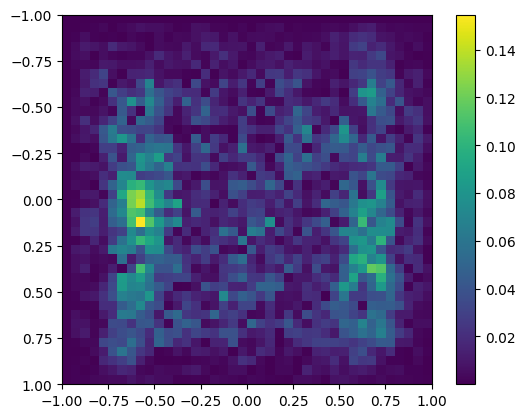

In [36]:
ax=plt.subplot()
clip_error=np.linalg.norm(U_agg-U_real,ord=np.inf)
im = ax.imshow(np.clip(np.abs(U_agg-U_real),0,clip_error).reshape(X.shape),extent=[-1,1,1,-1])
#ax.scatter(u_right.X_int[:,0],u_right.X_int[:,1],c='r',s=4)
#ax.scatter(u_left.X_int[:,0],u_left.X_int[:,1],c='g',s=2)
plt.colorbar(im)